<a href="https://colab.research.google.com/github/easy-min/dacon_/blob/main/data_g_f%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://dacon.io/competitions/official/236038/codeshare/7282

In [1]:
#https://dacon.io/competitions/official/236038/overview/rules

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.linear_model 
import sklearn.ensemble 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') 

from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', None)
sns.set(rc = {'figure.figsize':(15,3)})
sns.set(font_scale=0.8)

%matplotlib inline

In [3]:
print('pandas Version :', pd.__version__)
print('numpy Version :', np.__version__)
print('sklearn Version :', sklearn.__version__)
print('seaborn Version :', sns.__version__)

'''
pandas Version : 1.4.1
numpy Version : 1.19.5
sklearn Version : 1.0.2
seaborn Version : 0.11.2
ipython : 8.1.1
pip : 22.0.4
'''

pandas Version : 1.3.5
numpy Version : 1.22.4
sklearn Version : 1.0.2
seaborn Version : 0.11.2


'\npandas Version : 1.4.1\nnumpy Version : 1.19.5\nsklearn Version : 1.0.2\nseaborn Version : 0.11.2\nipython : 8.1.1\npip : 22.0.4\n'

In [4]:
#!pip list

# 데이터 로딩

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/dacon/g/train.csv', encoding='UTF-8')
df_test = pd.read_csv('/content/drive/MyDrive/dacon/g/test.csv', encoding='UTF-8')
df_submission = pd.read_csv('/content/drive/MyDrive/dacon/g/sample_submission.csv')

df_train.head(2)

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,2022-10-26 새순,2022-10-27 새순,2022-10-28 새순,2022-10-29 새순,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순,2022-11-09 새순,2022-11-10 새순,2022-11-11 새순,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-16 새순,2022-11-17 새순,2022-11-18 새순,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,2022-09-12 엽록소,2022-09-13 엽록소,2022-09-14 엽록소,2022-09-15 엽록소,2022-09-16 엽록소,2022-09-17 엽록소,2022-09-18 엽록소,2022-09-19 엽록소,2022-09-20 엽록소,2022-09-21 엽록소,2022-09-22 엽록소,2022-09-23 엽록소,2022-09-24 엽록소,2022-09-25 엽록소,2022-09-26 엽록소,2022-09-27 엽록소,2022-09-28 엽록소,2022-09-29 엽록소,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1.3,1.3,1.3,1.2,1.2,1.2,1.2,1.2,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,77.382045,77.211789,77.151051,77.063069,76.905981,76.868475,76.732897,76.669280,76.662585,76.519409,76.349661,76.186091,76.040207,75.999415,75.990592,75.953731,75.829564,75.798673,75.621243,75.427005,75.266187,75.226094,75.162319,75.079444,75.013855,74.935697,74.842749,74.836657,74.816928,74.788574,74.690358,74.504942,74.394908,74.351704,74.166346,74.020254,73.835142,73.766164,73.755269,73.627395,73.465457,73.395076,73.311405,73.243028,73.087409,73.081651,73.023755,72.987263,72.977606,72.838462,72.645386,72.512869,72.445908,72.370097,72.301180,72.228374,72.207746,72.068354,71.987663,71.869466,71.852923,71.690854,71.576402,71.384018,71.301893,71.234817,71.076903,70.996113,70.985843,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.29383,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,3.0,2.9

In [7]:
# 함수 정의 : df_v1 ~ df_v9까지 원하는 데이터 추출할 수 있음
def fn_get_feature_v3(df, idx=2) :    
    idx = 2 - idx
    if idx > 7 :
        idx = 6
    
    # 파생 변수
    df = df.copy()
    df['새순mean'] = df.iloc[:,6-idx:95-idx].mean(axis=1)
    df['새순std'] = df.iloc[:,6-idx:95-idx].std(axis=1)
    df['새순min'] = df.iloc[:,6-idx:95-idx].min(axis=1)
    df['새순max'] = df.iloc[:,6-idx:95-idx].max(axis=1)
    df['새순gap'] = df.iloc[:,94-idx] - df.iloc[:,6-idx]
    
    df['엽록소mean'] = df.iloc[:,95-idx:184-idx].mean(axis=1)
    df['엽록소std'] = df.iloc[:,95-idx:184-idx].std(axis=1)
    df['엽록소min'] = df.iloc[:,95-idx:184-idx].min(axis=1)
    df['엽록소max'] = df.iloc[:,95-idx:184-idx].max(axis=1)
    df['엽록소gap'] = df.iloc[:,183-idx] - df.iloc[:,95-idx]  
    

    df_v1 = df.iloc[:,1-idx:6-idx] # 시계열 데이터 제외한 학습 데이터
    df_v2 = df.iloc[:,1-idx:184-idx] # 원본 데이터
    df_v3 = pd.concat([df.iloc[:,1-idx:6-idx], df.iloc[:,184-idx:]], axis=1) # 파생변수 포함한 학습 데이터 (세순 및 엽록소 시계열 데이터 제외)
    df_v4 = df.iloc[:,1-idx:] # 파생변수까지 모두 포함한 학습 데이터
    df_v5 = pd.concat([df.iloc[:,1-idx:6-idx], df.iloc[:,184-idx:189-idx]], axis=1) # 시계열 데이터 제외, 새순 관련 파생병수만 포함된 학습 데이터
    df_v6 = df.iloc[:,1-idx:189-idx] # 원본데이터에 새순 관련 파생변수만 포함한 학습 데이터
    
    df_v7 = pd.concat([df.iloc[:,1-idx:95-idx], df.iloc[:,184-idx:189-idx]], axis=1) # 수고,수관폭 및 세순관련 시계열 데이터 + 파생변수만 포함된 학습 데이터
    df_v8 = pd.concat([df.iloc[:,1-idx:95-idx], df.iloc[:,184-idx:]], axis=1) # 수고,수관폭, 세순관련 시계열 데이터, 세순 관련 파생변수, 엽록소 관련 파생변수가 포함된 학습 데이터
    
    df_v9 = pd.concat([df.iloc[:,1-idx], df.iloc[:,6-idx:95-idx]], axis=1)
    df_v9 = pd.concat([df_v9, df.iloc[:,184-idx:189-idx]], axis=1) # 새순관련 시계열 데이터 및 세순 관련 파생변수만 포한된 학습데이터
    

    return df_v1, df_v2, df_v3, df_v4, df_v5, df_v6, df_v7, df_v8, df_v9

In [8]:
# NMAE 정의
def nmae_score(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [9]:
# 해당 함수로 x,y 지정, 스케일링, 랜덤포레스트, 스코어까지 도출
def fn_exec_model_RandomForestRegressor(df_train, n_estimators=300, max_depth=5, test_size=0.3) :
    
    # ID, 착과량 컬럼 삭제
    x = df_train
    if df_train.columns.isin(['ID']).any() :
        x = df_train.drop(['ID'], axis=1)    
    if df_train.columns.isin(['착과량(int)']).any() :
        x = df_train.drop(['착과량(int)'], axis=1)
        
    y = df_train['착과량(int)']
    #display(x.head(2))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=10)
    #print("Train Shape : ", x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    scaler = MinMaxScaler() # 스케일링
    #scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)    
    
    # 위에서 지정하는 파라미터
    model_rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
    model_rfr.fit(x_train_scaled, y_train)
    pred_rfr = model_rfr.predict(x_test_scaled)
    score_nmae = round(nmae_score(y_test, pred_rfr),5) # nmae 계산
    #print(f"RandomForestRegressor : {n_estimators} - nmae : {score_nmae} ")
    
    return score_nmae

In [10]:
# 예측하는 함수 정의
def fn_exec_model_predict(df_train, df_test, n_estimators=300, max_depth=5) :

    # ***************************** Train ********************************
    # Make the dataset for train
    x_train = df_train
    y_train = df_train['착과량(int)']
    
    # ID, 착과량 컬럼 삭제제
    if df_train.columns.isin(['ID']).any() :
        x_train = df_train.drop(['ID'], axis=1)    
    if df_train.columns.isin(['착과량(int)']).any() :
        x_train = df_train.drop(['착과량(int)'], axis=1)
    
    # Scale
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    
    # Train
    model_rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
    model_rfr.fit(x_train_scaled, y_train)
    

    # ***************************** Predict ******************************    
    # Make the dataset for test    
    x_test = df_test
    if df_test.columns.isin(['ID']).any() :
        x_test = df_test.drop(['ID'], axis=1)    
    if df_test.columns.isin(['착과량(int)']).any() :
        x_test = df_test.drop(['착과량(int)'], axis=1)
    
    # Scale
    x_test_scaled = scaler.transform(x_test)    

    # Predict
    pred_rfr = model_rfr.predict(x_test_scaled)

    #display(pred_rfr)
    return pred_rfr

# 파생변수 생성

In [11]:
# 첫번째 함수로 파생변수 생성성
df_train_v1, df_train_v2, df_train_v3, df_train_v4, df_train_v5, df_train_v6, df_train_v7, df_train_v8, df_train_v9 = fn_get_feature_v3(df_train, idx=2)
df_train_v2.head(2) # 원본 데이터

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,2022-10-26 새순,2022-10-27 새순,2022-10-28 새순,2022-10-29 새순,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순,2022-11-09 새순,2022-11-10 새순,2022-11-11 새순,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-16 새순,2022-11-17 새순,2022-11-18 새순,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,2022-09-12 엽록소,2022-09-13 엽록소,2022-09-14 엽록소,2022-09-15 엽록소,2022-09-16 엽록소,2022-09-17 엽록소,2022-09-18 엽록소,2022-09-19 엽록소,2022-09-20 엽록소,2022-09-21 엽록소,2022-09-22 엽록소,2022-09-23 엽록소,2022-09-24 엽록소,2022-09-25 엽록소,2022-09-26 엽록소,2022-09-27 엽록소,2022-09-28 엽록소,2022-09-29 엽록소,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1.3,1.3,1.3,1.2,1.2,1.2,1.2,1.2,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,77.382045,77.211789,77.151051,77.063069,76.905981,76.868475,76.732897,76.669280,76.662585,76.519409,76.349661,76.186091,76.040207,75.999415,75.990592,75.953731,75.829564,75.798673,75.621243,75.427005,75.266187,75.226094,75.162319,75.079444,75.013855,74.935697,74.842749,74.836657,74.816928,74.788574,74.690358,74.504942,74.394908,74.351704,74.166346,74.020254,73.835142,73.766164,73.755269,73.627395,73.465457,73.395076,73.311405,73.243028,73.087409,73.081651,73.023755,72.987263,72.977606,72.838462,72.645386,72.512869,72.445908,72.370097,72.301180,72.228374,72.207746,72.068354,71.987663,71.869466,71.852923,71.690854,71.576402,71.384018,71.301893,71.234817,71.076903,70.996113,70.985843,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.29383,70.262422,70.169841,70.043251
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,

# EDA 수행

In [12]:
df_train_v3.head() # 파생변수 포함한 학습 데이터 (새순 및 엽록소 시계열 데이터 제외)

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순min,새순max,새순gap,엽록소mean,엽록소std,엽록소min,엽록소max,엽록소gap
0,692,275.0,287.0,292.0,289.5,1.693258,0.638143,0.6,2.8,-2.2,74.155836,2.427798,70.043251,78.336504,-8.293252
1,534,293.0,284.0,336.0,310.0,1.861798,0.894491,0.0,3.3,-3.3,74.962123,2.813831,70.427600,80.116691,-9.689090
2,634,300.0,392.0,450.0,421.0,1.762921,0.712611,0.5,3.0,-2.5,74.727999,2.476758,70.399578,79.118529,-8.718951
3,639,289.0,368.0,379.0,373.5,1.857303,0.692802,0.7,3.1,-2.4,73.546210,2.641605,69.133970,77.936262,-8.802293
4,496,306.0,353.0,358.0,355.5,2.125843,0.898171,0.6,3.7,-3.1,71.841067,2.642378,67.410093,76.233231,-8.823138


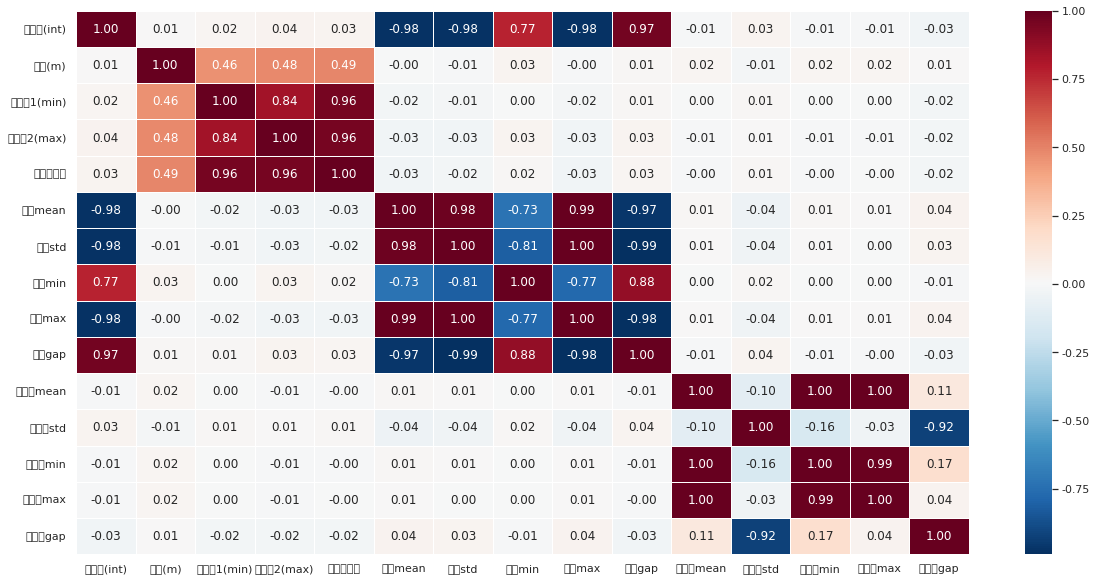

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data = df_train_v3.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
plt.show()

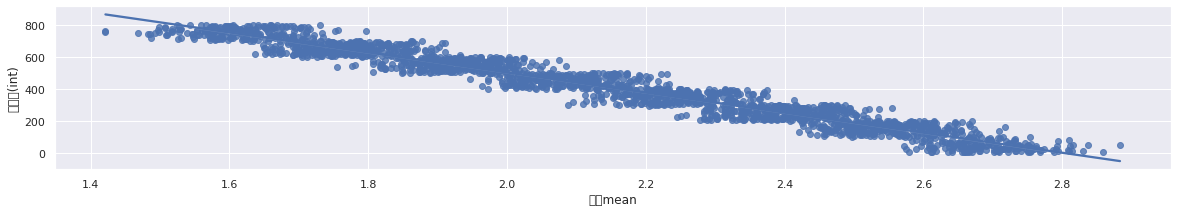

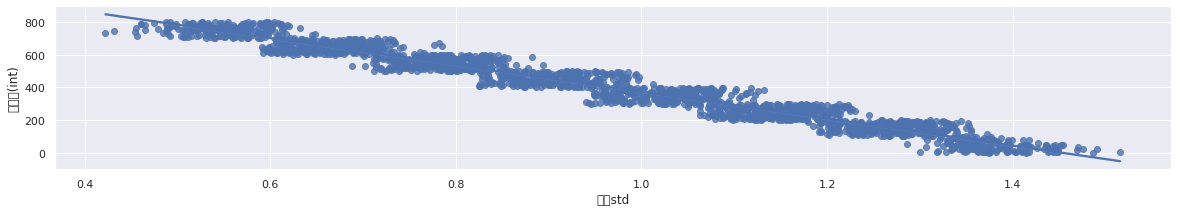

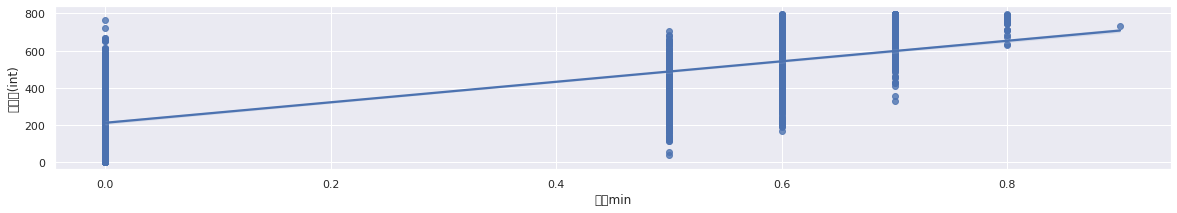

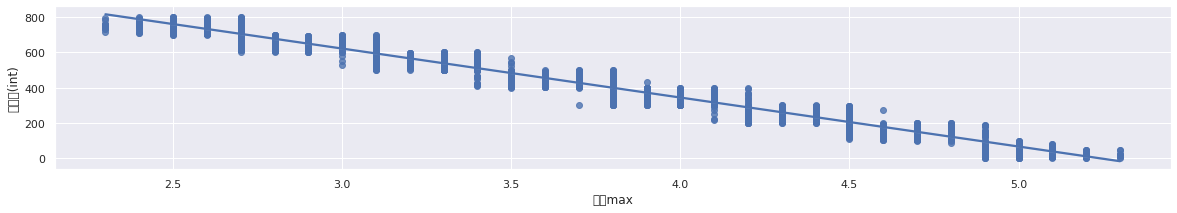

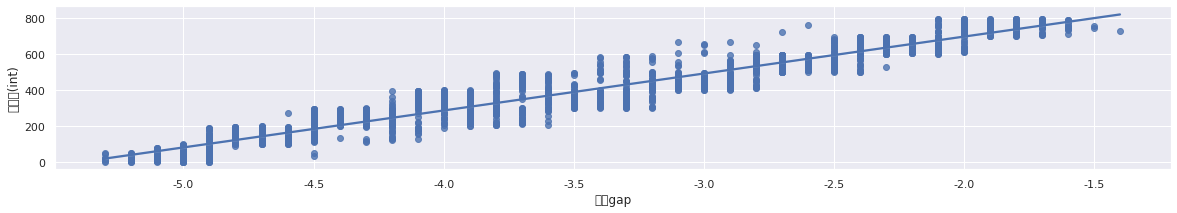

In [14]:
sns.set(rc = {'figure.figsize':(20,3)})
sns.regplot(x='새순mean', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='새순std', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='새순min', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='새순max', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='새순gap', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()

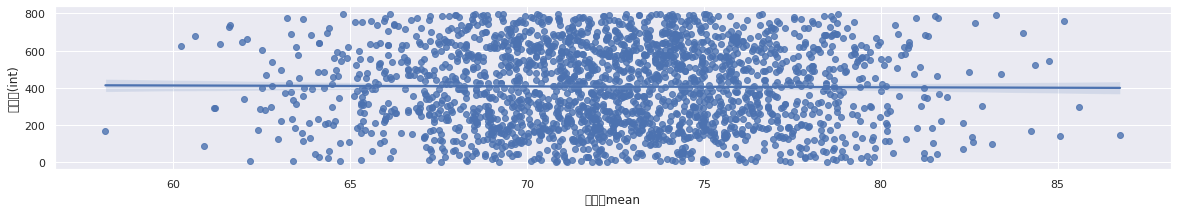

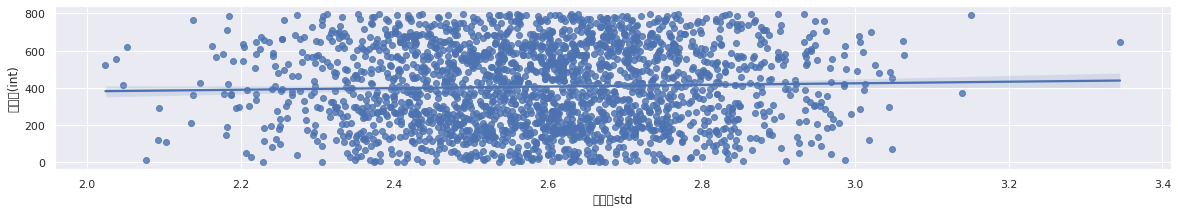

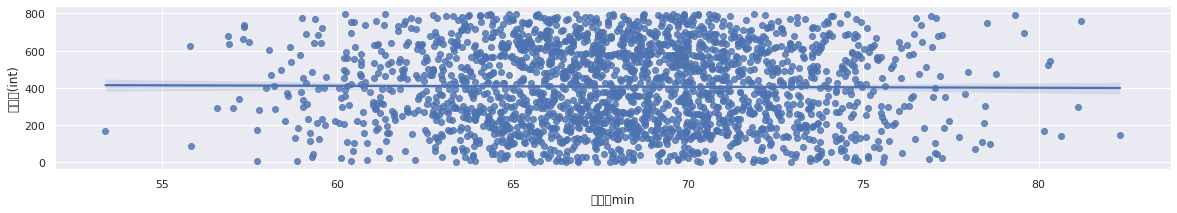

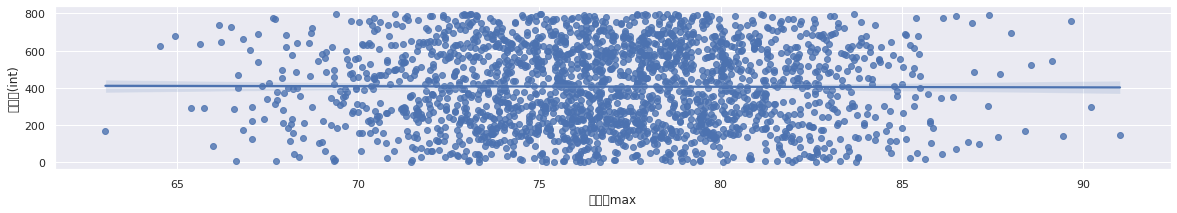

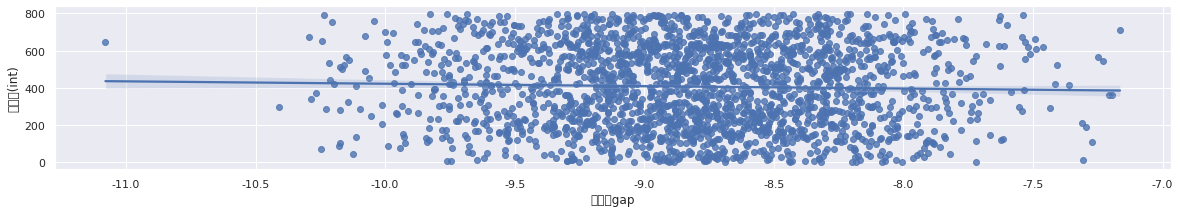

In [15]:
sns.set(rc = {'figure.figsize':(20,3)})
sns.regplot(x='엽록소mean', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='엽록소std', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='엽록소min', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='엽록소max', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()
sns.regplot(x='엽록소gap', y='착과량(int)', data=df_train_v3, dropna=True)
plt.show()

In [16]:
# 새순 평균 & 엽록소 평균으로 파생변수 만들기
df_train_v3_1 = df_train_v3.copy()
# 엽록소 mean 소수점 첫째자리에서 반올림
df_train_v3_1['엽록소mean2'] = round(df_train_v3_1['엽록소mean']/100,2)*100
# (새순 평균 / 엽록소 평균) * 100
df_train_v3_1['새순_엽록소mean'] = round(df_train_v3_1['새순mean']/df_train_v3_1['엽록소mean'],7)*100
# (새순 평균 * 엽록소 평균) / 1000 * 100
df_train_v3_1['새순_엽록소mean2'] = round(df_train_v3_1['새순mean']*df_train_v3_1['엽록소mean']/1000,7)*100
df_train_v3_1.head(2)

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순min,새순max,새순gap,엽록소mean,엽록소std,엽록소min,엽록소max,엽록소gap,엽록소mean2,새순_엽록소mean,새순_엽록소mean2
0,692,275.0,287.0,292.0,289.5,1.693258,0.638143,0.6,2.8,-2.2,74.155836,2.427798,70.043251,78.336504,-8.293252,74.0,2.28338,12.55650
1,534,293.0,284.0,336.0,310.0,1.861798,0.894491,0.0,3.3,-3.3,74.962123,2.813831,70.427600,80.116691,-9.689090,75.0,2.48365,13.95643


<AxesSubplot:>

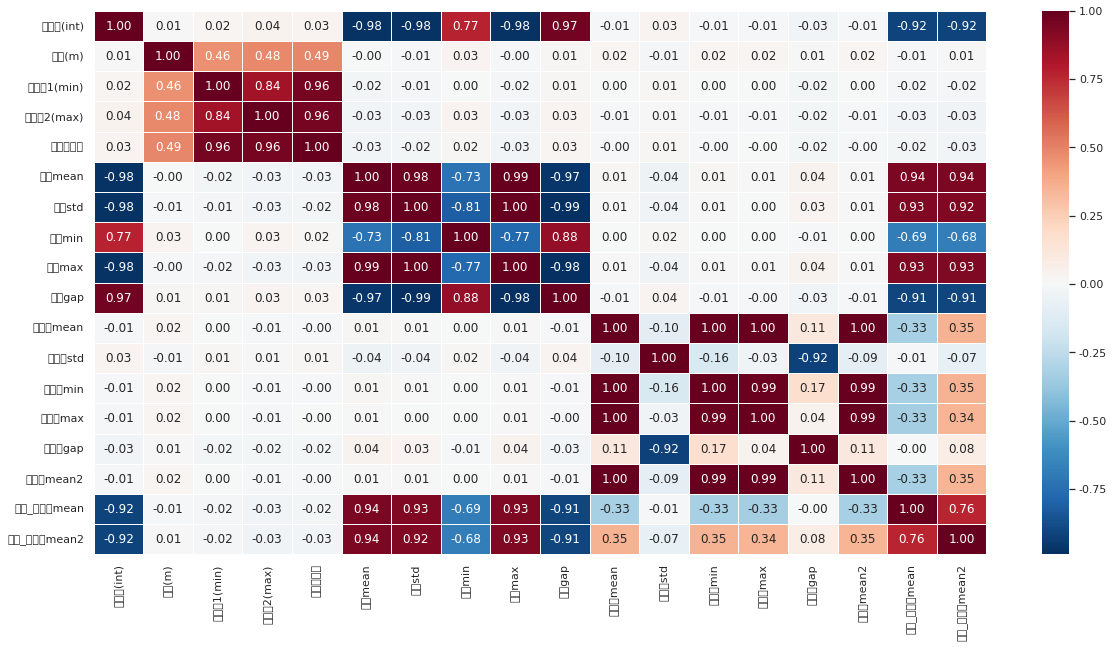

In [17]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data = df_train_v3_1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')

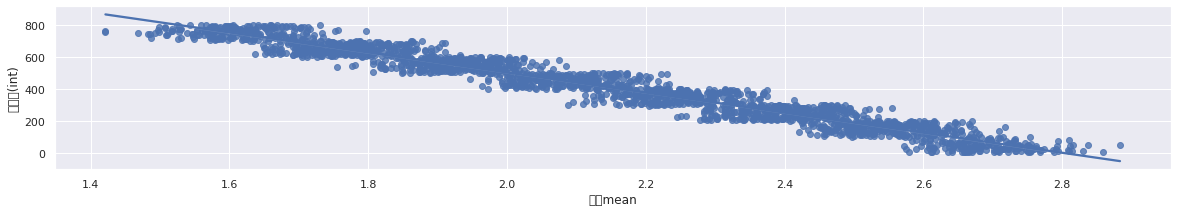

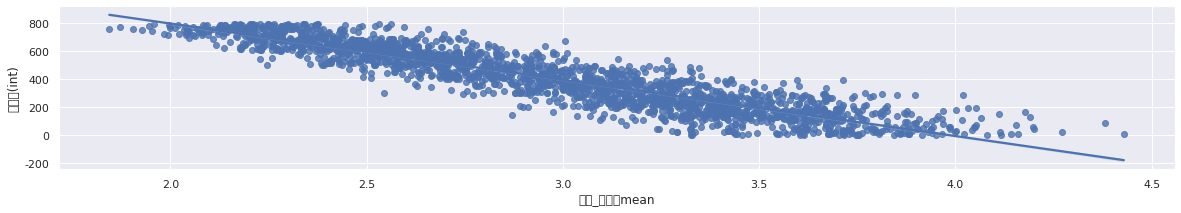

In [18]:
sns.set(rc = {'figure.figsize':(20,3)})
sns.regplot(x='새순mean', y='착과량(int)', data=df_train_v3_1.iloc[:])
plt.show()
sns.regplot(x='새순_엽록소mean', y='착과량(int)', data=df_train_v3_1.iloc[:])
plt.show()

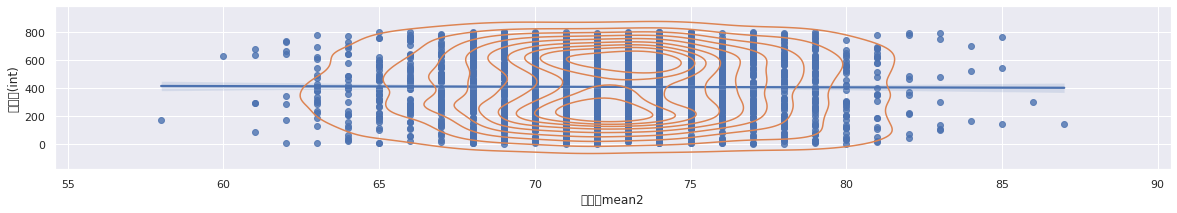

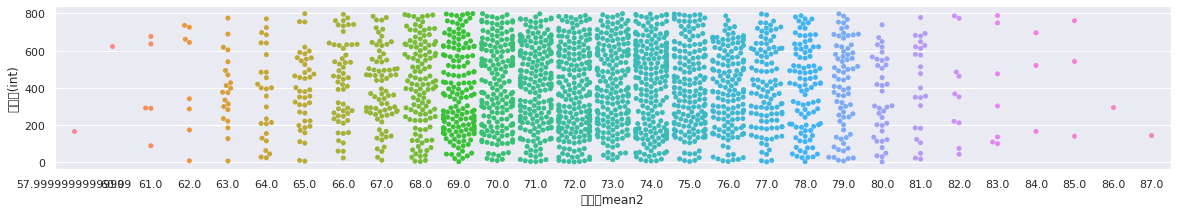

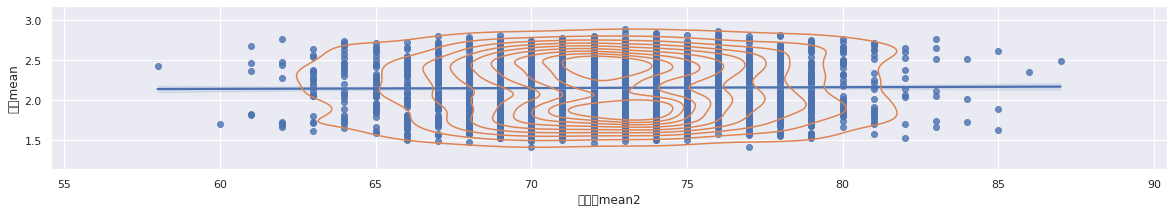

In [19]:
# regplot = scatter & line plot 같이 볼 수 있음
# kdeplot = 커널 밀도 추청 (히스토그램 부드럽게 그려줌)
# swarmplot = scatter이지만 데이터 중첩X

sns.regplot(x='엽록소mean2', y='착과량(int)', data=df_train_v3_1.iloc[:])
sns.kdeplot(x='엽록소mean2', y='착과량(int)', data=df_train_v3_1.iloc[:])
plt.show()

sns.swarmplot(x='엽록소mean2', y='착과량(int)', data=df_train_v3_1.iloc[:])
plt.show()

sns.regplot(x='엽록소mean2', y='새순mean', data=df_train_v3_1.iloc[:])
sns.kdeplot(x='엽록소mean2', y='새순mean', data=df_train_v3_1.iloc[:])
plt.show()

## EDA 결과

- 새순 & 착과량은 강한 음의 관계 : -0.98, regplot도 음의 방향임
- 엽록소 & 착과량은 큰 상관관계가 없는 것으로 보임
- 수고,수관폭 & 착과량도 큰 상관관계를 보이고 있지 않음
- 엽록소 & 수고,수관폭은 학습 시 제외하는 것으로 함
- 엽록소가 포함된 파생변수를 생성하였지만, 상관관계를 오히려 방해하는 것으로 판단됨 : 처음 regplot 내 선의 기울기보다 두번째 regplot&swarmplot의 기울기가 더 완만
- 새순 관련된 시계열 정보와 통계 정보만을 이용하여 학습 진행

# 모델 생성 및 평가

## 하이퍼파라메터 선정

In [20]:
best_score = 1

for n_estimators in range(400,500,10) :
    for max_depth in range(4,6) :
        score = fn_exec_model_RandomForestRegressor(df_train_v4, n_estimators=n_estimators, max_depth=max_depth)

        # rmse가 best_score보다 낮으면, 매개변수와 함께 기록
        if score < best_score :
            best_score = score
            best_parameters = {'n_estimators':n_estimators, 'max_depth':max_depth, 'df_train':"df_train_v4"}
            print(f"{n_estimators}, {max_depth} : {score} <----- best Score")
        else :
            print(f"{n_estimators}, {max_depth} : {score}")
            
print('best rmse score(in cross_val): ', best_score)
print('최적의 매개변수: ', best_parameters)    

400, 4 : 0.07336 <----- best Score
400, 5 : 0.07368
410, 4 : 0.07335 <----- best Score
410, 5 : 0.07367
420, 4 : 0.07334 <----- best Score
420, 5 : 0.07364
430, 4 : 0.07334
430, 5 : 0.07362
440, 4 : 0.07334
440, 5 : 0.07363
450, 4 : 0.07332 <----- best Score
450, 5 : 0.07363
460, 4 : 0.07332
460, 5 : 0.07363
470, 4 : 0.07332
470, 5 : 0.07364
480, 4 : 0.07333
480, 5 : 0.07364
490, 4 : 0.07333
490, 5 : 0.07364
best rmse score(in cross_val):  0.07332
최적의 매개변수:  {'n_estimators': 450, 'max_depth': 4, 'df_train': 'df_train_v4'}


굳이 이 방법보다 우리가 아는 하이퍼 파라미터 찾는 코드 쓰면 될 듯

하이퍼 파레머터 선정 결과
- 다양한 모델들에 대해서 진행하였으며, RandomForestRegressor가 가장 좋은 결과를 가졌음
- 또한 n_estimators = 400 ~ 500, max_depth = 5 일때가 좋은 학습 결과를 가짐

In [21]:
print("사용한 학습데이터 버전 : df_train_v9 - 새순 관련 시계열과 파생변수만 사용")
n_estimators = 500
max_depth = 5

print("모델 : RandomForestRegressor")
print("하이퍼파라메타 : n_estimators=500, max_depth=5")
print("학습데이터 검증을 위한 테스트셋 사이즈 30%")
score = fn_exec_model_RandomForestRegressor(df_train_v9, n_estimators=n_estimators, max_depth=max_depth)
print(f"NMAE : {score}")

사용한 학습데이터 버전 : df_train_v9 - 새순 관련 시계열과 파생변수만 사용
모델 : RandomForestRegressor
하이퍼파라메타 : n_estimators=500, max_depth=5
학습데이터 검증을 위한 테스트셋 사이즈 30%
NMAE : 0.07342


# 예측 및 결과 저장

In [22]:
# The best result
df_test_v1, df_test_v2, df_test_v3, df_test_v4, df_test_v5, df_test_v6, df_test_v7, df_test_v8, df_test_v9 = fn_get_feature_v3(df_test, idx=1)
pred = fn_exec_model_predict(df_train_v9, df_test_v9, n_estimators=n_estimators, max_depth=max_depth)
df_submission['착과량(int)'] = pred
df_submission.to_csv('./submit_model_rfr_type9_final.csv', index=False)
display(df_submission)

,ID,착과량(int)
0,TEST_0000,247.167712
1,TEST_0001,753.752185
2,TEST_0002,151.699445
3,TEST_0003,448.403894
4,TEST_0004,685.501592
...,...,...
2203,TEST_2203,754.207627
2204,TEST_2204,337.601650
2205,TEST_2205,358.527152
2206,TEST_2206,243.299788


In [23]:
# The second result : 수고,수관폭 및 세순관련 시계열 데이터 + 파생변수만 포함된 학습 데이터
df_test_v1, df_test_v2, df_test_v3, df_test_v4, df_test_v5, df_test_v6, df_test_v7, df_test_v8, df_test_v9 = fn_get_feature_v3(df_test, idx=1)
pred = fn_exec_model_predict(df_train_v7, df_test_v7, n_estimators=n_estimators, max_depth=max_depth)
df_submission['착과량(int)'] = pred
df_submission.to_csv('./submit_model_rfr_type7_final.csv', index=False)
display(df_submission)

,ID,착과량(int)
0,TEST_0000,247.321093
1,TEST_0001,754.597575
2,TEST_0002,151.703672
3,TEST_0003,449.015865
4,TEST_0004,683.607004
...,...,...
2203,TEST_2203,754.573179
2204,TEST_2204,340.213524
2205,TEST_2205,355.275867
2206,TEST_2206,244.066967


# [1] XGBoost

In [24]:
import os
import torch
import random

import pandas as pd
import numpy as np

from sklearn.model_selection import KFold

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [25]:

def nmae_score(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

def xgb_nmae(pred, dtrain):
    true = dtrain.get_label()
    return "nmae", nmae_score(true, pred)

In [26]:
labels = df_train_v9["착과량(int)"]
feature_columns = df_train_v9.loc[:, "2022-09-01 새순":"2022-11-28 새순"].columns 

print("학습에는 새순 Features 89개를 사용했습니다.\n")
print(feature_columns)

학습에는 새순 Features 89개를 사용했습니다.

Index(['2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       '2022-09-05 새순', '2022-09-06 새순', '2022-09-07 새순', '2022-09-08 새순',
       '2022-09-09 새순', '2022-09-10 새순', '2022-09-11 새순', '2022-09-12 새순',
       '2022-09-13 새순', '2022-09-14 새순', '2022-09-15 새순', '2022-09-16 새순',
       '2022-09-17 새순', '2022-09-18 새순', '2022-09-19 새순', '2022-09-20 새순',
       '2022-09-21 새순', '2022-09-22 새순', '2022-09-23 새순', '2022-09-24 새순',
       '2022-09-25 새순', '2022-09-26 새순', '2022-09-27 새순', '2022-09-28 새순',
       '2022-09-29 새순', '2022-09-30 새순', '2022-10-01 새순', '2022-10-02 새순',
       '2022-10-03 새순', '2022-10-04 새순', '2022-10-05 새순', '2022-10-06 새순',
       '2022-10-07 새순', '2022-10-08 새순', '2022-10-09 새순', '2022-10-10 새순',
       '2022-10-11 새순', '2022-10-12 새순', '2022-10-13 새순', '2022-10-14 새순',
       '2022-10-15 새순', '2022-10-16 새순', '2022-10-17 새순', '2022-10-18 새순',
       '2022-10-19 새순', '2022-10-20 새순', '2022-10-21 새순', '2022-10-22

In [27]:
FOLDS = 5 
kfold = KFold(n_splits=FOLDS, random_state=42, shuffle=True)

feature_importance_df = pd.DataFrame()
oof = np.zeros(len(df_train_v9))
pred = np.zeros(len(df_test_v9))

for trn_idx, val_idx in kfold.split(df_train_v9):
    # k-fold 방식으로 train set과 valid set 분류
    X_train = df_train_v9.loc[trn_idx, feature_columns].reset_index(drop=True)
    y_train = df_train_v9.loc[trn_idx, "착과량(int)"].reset_index(drop=True)
    X_valid = df_train_v9.loc[val_idx, feature_columns].reset_index(drop=True)
    y_valid = df_train_v9.loc[val_idx, "착과량(int)"].reset_index(drop=True)
    
    # 위에서 분류된 data set을 반복적으로 xgbregressor 모델에 적용
    lr = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=50000,
        learning_rate=0.01,
        subsample=0.7,
        colsample_bytree=0.3,
        random_state=42,
        )
    lr.fit(X_train, y_train, 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    eval_metric=xgb_nmae, 
    early_stopping_rounds=200,
    verbose=False)
    
    # valid data에 대한 예측값을 oof에 저장, test에 대한 예측값을 pred에 저장, feature_importance_df에 feature와 importance 저장
    oof[val_idx] = lr.predict(X_valid)
    pred += lr.predict(df_test_v9[feature_columns]) / FOLDS
    feature_importance_df = pd.concat([feature_importance_df, 
                                       pd.DataFrame(zip(feature_columns, lr.feature_importances_), columns=["feature", "importance"])])
else:
    feature_importance_df = feature_importance_df.groupby("feature").mean().sort_values("importance", ascending=False).reset_index()
    print("새순 Features 중 착과량에 가장 큰 영향을 주는 일자는 대부분 9월에 집중되어 있었음\n")
    print(feature_importance_df.head(10)) 
    print(nmae_score(labels, oof)), 
    print(mean_absolute_error(labels, oof))

새순 Features 중 착과량에 가장 큰 영향을 주는 일자는 대부분 9월에 집중되어 있었음

         feature  importance
0  2022-09-07 새순    0.134390
1  2022-09-16 새순    0.087047
2  2022-09-02 새순    0.081443
3  2022-09-05 새순    0.076677
4  2022-09-11 새순    0.073762
5  2022-09-14 새순    0.056333
6  2022-09-10 새순    0.050703
7  2022-09-15 새순    0.042787
8  2022-09-19 새순    0.039300
9  2022-09-04 새순    0.036135
0.07382409476729464
29.98900641323378


In [28]:
best_score = 999999
best_cnt = 999999

print("사용한 새순 Features 개수별 validation score")

for cnt in [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]: # 사용할 Features 개수 임의 지정
    feature_columns = feature_importance_df.iloc[:cnt, 0].tolist() # 중요 변수 중 상위 몇 개까지 사용할지
    oof = np.zeros(len(df_train_v9))
    pred = np.zeros(len(df_test_v9))

    for trn_idx, val_idx in kfold.split(df_train_v9):
        X_train = df_train_v9.loc[trn_idx, feature_columns].reset_index(drop=True)
        y_train = df_train_v9.loc[trn_idx, "착과량(int)"].reset_index(drop=True)
        X_valid = df_train_v9.loc[val_idx, feature_columns].reset_index(drop=True)
        y_valid = df_train_v9.loc[val_idx, "착과량(int)"].reset_index(drop=True)

        lr = XGBRegressor(
            objective="reg:squarederror",
            n_estimators=50000,
            learning_rate=0.01,
            subsample=0.7,
            colsample_bytree=0.3,
            random_state=42,
            )
        lr.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], 
        eval_metric=xgb_nmae, 
        early_stopping_rounds=200, 
        verbose=False)
        
        oof[val_idx] = lr.predict(X_valid)
        pred += lr.predict(df_test_v9[feature_columns]) / FOLDS

    
    print("Feature 수 :", cnt, "/ 결과 :", mean_absolute_error(labels, oof))

    if best_score>mean_absolute_error(labels, oof):
        best_score = mean_absolute_error(labels, oof)
        best_cnt = cnt
        oof_xgb = oof.copy()
        pred_xgb = pred.copy()

사용한 새순 Features 개수별 validation score
Feature 수 : 20 / 결과 : 29.986007674873605
Feature 수 : 25 / 결과 : 29.949397339019292
Feature 수 : 30 / 결과 : 29.945617941098888
Feature 수 : 35 / 결과 : 29.97863223858424
Feature 수 : 40 / 결과 : 29.987451800513604
Feature 수 : 45 / 결과 : 29.959170861324143
Feature 수 : 50 / 결과 : 29.92061504887735
Feature 수 : 55 / 결과 : 29.90271630090559
Feature 수 : 60 / 결과 : 29.916535260399705
Feature 수 : 65 / 결과 : 29.92043141882291
Feature 수 : 70 / 결과 : 29.94567816733882


In [29]:
nmae_score(labels, oof_xgb)

0.0736116739440697

# [2] lightGBM

In [30]:
feature_columns = df_train.loc[:, "2022-09-01 새순":"2022-11-28 새순"].columns

feature_importance_df = pd.DataFrame()
oof = np.zeros(len(df_train_v9))
pred = np.zeros(len(df_test_v9))

for trn_idx, val_idx in kfold.split(df_train_v9):
    X_train = df_train_v9.loc[trn_idx, feature_columns].reset_index(drop=True)
    y_train = df_train_v9.loc[trn_idx, "착과량(int)"].reset_index(drop=True)
    X_valid = df_train_v9.loc[val_idx, feature_columns].reset_index(drop=True)
    y_valid = df_train_v9.loc[val_idx, "착과량(int)"].reset_index(drop=True)

    lr = LGBMRegressor(
        n_estimators=50000,
        learning_rate=0.01,
        subsample=0.7,
        colsample_bytree=0.3,
        random_state=42,
        )
    lr.fit(X_train, y_train, 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    early_stopping_rounds=500, 
    verbose=1000)
    
    oof[val_idx] = lr.predict(X_valid)
    pred += lr.predict(df_test[feature_columns]) / FOLDS
    feature_importance_df = pd.concat([feature_importance_df, 
                                       pd.DataFrame(zip(feature_columns, lr.feature_importances_), columns=["feature", "importance"])])
else:
    feature_importance_df = feature_importance_df.groupby("feature").mean().sort_values("importance", ascending=False).reset_index()
    print(nmae_score(labels, oof), mean_absolute_error(labels, oof))

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[426]	training's l2: 951.335	valid_1's l2: 1584.66
Training until validation scores don't improve for 500 rounds.
[1000]	training's l2: 769.71	valid_1's l2: 1428.47
Early stopping, best iteration is:
[558]	training's l2: 922.865	valid_1's l2: 1394.64
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[362]	training's l2: 1063.21	valid_1's l2: 1334.17
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[431]	training's l2: 976.194	valid_1's l2: 1395.44
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[483]	training's l2: 965.637	valid_1's l2: 1329.56
0.07400102381726167 30.0608789696244


In [31]:
best_score = 999999
best_cnt = 999999

for cnt in [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]:
    feature_columns = feature_importance_df.iloc[:cnt, 0].tolist()
    oof = np.zeros(len(df_train_v9))
    pred = np.zeros(len(df_test_v9))

    for trn_idx, val_idx in kfold.split(df_train_v9):
        X_train = df_train_v9.loc[trn_idx, feature_columns].reset_index(drop=True)
        y_train = df_train_v9.loc[trn_idx, "착과량(int)"].reset_index(drop=True)
        X_valid = df_train_v9.loc[val_idx, feature_columns].reset_index(drop=True)
        y_valid = df_train_v9.loc[val_idx, "착과량(int)"].reset_index(drop=True)

        lr = LGBMRegressor(
            n_estimators=50000,
            learning_rate=0.01,
            subsample=0.7,
            colsample_bytree=0.3,
            random_state=42,
            )
        lr.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], 
        early_stopping_rounds=500, 
        verbose=1000)
        
        oof[val_idx] = lr.predict(X_valid)
        pred += lr.predict(df_test_v9[feature_columns]) / FOLDS
    
    print(cnt, mean_absolute_error(labels, oof))
    if best_score>mean_absolute_error(labels, oof):
        best_score = mean_absolute_error(labels, oof)
        oof_lgb = oof.copy()
        pred_lgb = pred.copy()

Training until validation scores don't improve for 500 rounds.
[1000]	training's l2: 981.048	valid_1's l2: 1554.04
Early stopping, best iteration is:
[504]	training's l2: 1065.24	valid_1's l2: 1538.1
Training until validation scores don't improve for 500 rounds.
[1000]	training's l2: 996.915	valid_1's l2: 1405.54
Early stopping, best iteration is:
[551]	training's l2: 1081.3	valid_1's l2: 1374.73
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[385]	training's l2: 1160.54	valid_1's l2: 1286.49
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[442]	training's l2: 1108.49	valid_1's l2: 1360.19
Training until validation scores don't improve for 500 rounds.
[1000]	training's l2: 1018.45	valid_1's l2: 1347.8
Early stopping, best iteration is:
[543]	training's l2: 1094.96	valid_1's l2: 1332.89
20 29.85874829489679
Training until validation scores don't improve for 500 rounds.
[1000]	training's 

In [32]:
nmae_score(labels, oof_lgb)

0.07342039282325025

In [33]:
nmae_score(labels, (oof_xgb + oof_lgb)/2)

0.07329980098327707

# [3] TabNet

In [34]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f18b71f5852ea720dde7a37a28ebfea3a68e3caa5ba7a10fcb9c996d626f1780
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [35]:
import sklearn
sklearn.__version__

'1.0.2'

In [36]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3

In [37]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [39]:
import pandas as pd
import numpy as np
import random
import os

import warnings
warnings.filterwarnings('ignore') 

import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from pycaret.regression import *
from sklearn.model_selection import StratifiedKFold

In [41]:
!pip install pytorch-tabnet==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
pip install git+https://github.com/dreamquark-ai/tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/dreamquark-ai/tabnet to /tmp/pip-req-build-gnysuxc7
  Running command git clone --filter=blob:none --quiet https://github.com/dreamquark-ai/tabnet /tmp/pip-req-build-gnysuxc7
  Resolved https://github.com/dreamquark-ai/tabnet to commit bcae5f43b89fb2c53a0fe8be7c218a7b91afac96
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-4.0-py3-none-any.whl size=43913 sha256=d3709934c792ab33c5f1c5700b622336a24283f25ab39e828eb2f5e5b5470c30
  Stored in directory: /tmp/pip-ephem-wheel-cache-76x_51r1/wheels/b5/2b/5e/f2ea106d6f124f977961e0dad88fecca3f85467879913cd240
Successfully built pytorch-tabnet
  Attempting uninstall: pytorch-tabnet
    Found existing installation: pytorch-tabnet 3.1.1
    Uninstalling pytorch-tabnet-3.1.1:
    

In [44]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.augmentations import RegressionSMOTE

oof_nn = np.zeros(len(df_train_v9))
pred_nn = np.zeros(len(df_test_v9))


feature_columns= ["2022-09-02 새순", "2022-09-07 새순", "2022-09-05 새순", "2022-09-04 새순",
       "2022-09-11 새순", "2022-09-08 새순", "2022-09-16 새순", "2022-09-03 새순",
       "2022-09-10 새순", "2022-09-15 새순", "2022-09-14 새순", "2022-09-01 새순",
       "2022-09-06 새순", "2022-09-09 새순", "2022-09-13 새순", "2022-09-20 새순",
       "2022-09-18 새순", "2022-09-12 새순", "2022-09-17 새순", "2022-09-26 새순",
       "2022-09-19 새순", "2022-09-22 새순", "2022-10-03 새순", "2022-09-24 새순",
       "2022-09-30 새순"] # feature_importance top 31

for trn_idx, val_idx in kfold.split(df_train_v9):
    X_train = df_train_v9.loc[trn_idx, feature_columns].values
    y_train = df_train_v9.loc[trn_idx, "착과량(int)"].values.reshape(-1, 1)
    X_valid = df_train_v9.loc[val_idx, feature_columns].values
    y_valid = df_train_v9.loc[val_idx, "착과량(int)"].values.reshape(-1, 1)

    reg = TabNetRegressor(
        n_d=64, # [8, 64]
        n_a=64, # [8, 64]
        n_steps=10, # [3, 10]
        seed=42,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=1e-2),
        scheduler_params={"step_size":10, # how to use learning rate scheduler
                        "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type="sparsemax" # This will be overwritten if using pretrain model
    )

    reg.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=["train", "valid"],
        loss_fn=torch.nn.L1Loss(),
        eval_metric=["mae"],
        max_epochs=300,
        batch_size=64,
        patience=50,
    )

    oof_nn[val_idx] = reg.predict(X_valid).reshape(-1)
    pred_nn += reg.predict(df_test_v9[feature_columns].values).reshape(-1) / FOLDS

Device used : cpu
epoch 0  | loss: 371.24428| train_mae: 293.3441| valid_mae: 311.2232|  0:00:04s
epoch 1  | loss: 266.53006| train_mae: 293.49064| valid_mae: 314.33862|  0:00:09s
epoch 2  | loss: 80.06211| train_mae: 329.06068| valid_mae: 342.88496|  0:00:17s
epoch 3  | loss: 51.65582| train_mae: 239.56255| valid_mae: 251.7148|  0:00:26s
epoch 4  | loss: 52.31319| train_mae: 206.86913| valid_mae: 211.8183|  0:00:33s
epoch 5  | loss: 53.0455 | train_mae: 151.2609| valid_mae: 158.32365|  0:00:43s
epoch 6  | loss: 49.33143| train_mae: 120.46526| valid_mae: 122.81645|  0:00:47s
epoch 7  | loss: 44.79661| train_mae: 113.58472| valid_mae: 115.31887|  0:00:50s
epoch 8  | loss: 48.95472| train_mae: 92.06261| valid_mae: 93.15301|  0:00:52s
epoch 9  | loss: 47.64705| train_mae: 72.62897| valid_mae: 72.88951|  0:00:55s
epoch 10 | loss: 46.12691| train_mae: 56.57531| valid_mae: 57.71115|  0:00:57s
epoch 11 | loss: 48.60153| train_mae: 59.00037| valid_mae: 58.78771|  0:01:01s
epoch 12 | loss: 45.2

In [45]:
nmae_score(labels, oof_nn)

0.07925538514225443

In [46]:
nmae_score(labels, (oof_xgb*0.7 + oof_lgb*0.3)*0.95 + oof_nn*0.05)

0.07339570098065266